In [9]:
# dataframe opertations - pandas
import pandas as pd
import numpy as np
import time 
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import kruskal
#Trendtest
import pymannkendall as mk
#Seasonality test
from scipy import stats


In [3]:
#health = pd.read_csv('../output/cut-data.csv',
#    usecols=['dates','occupancy'], index_col='dates', parse_dates=True)
health = pd.read_csv('../output/08311.csv',
    usecols=['dates','occupancy'], index_col='dates', parse_dates=True)
health


,occupancy
dates,
2020-04-24,127
2020-04-25,126
2020-04-26,125
2020-04-27,128
2020-04-28,133
...,...
2024-04-15,182
2024-04-16,186
2024-04-17,186


In [4]:

print(health.shape)
print(health.head())

(1457, 1)
            occupancy
dates                
2020-04-24        127
2020-04-25        126
2020-04-26        125
2020-04-27        128
2020-04-28        133


<Axes: title={'center': 'occupancy Data'}, xlabel='dates'>

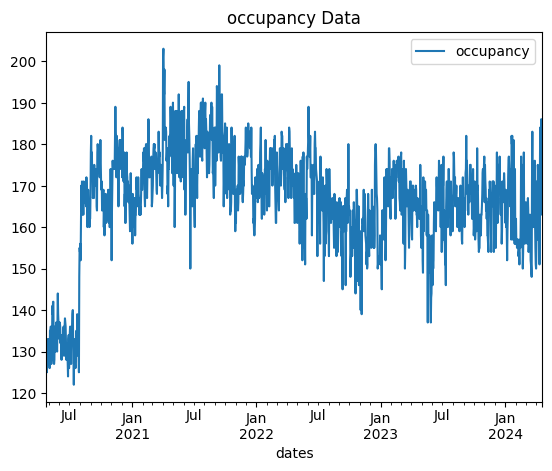

In [18]:

health[['occupancy']].plot(title='occupancy Data')

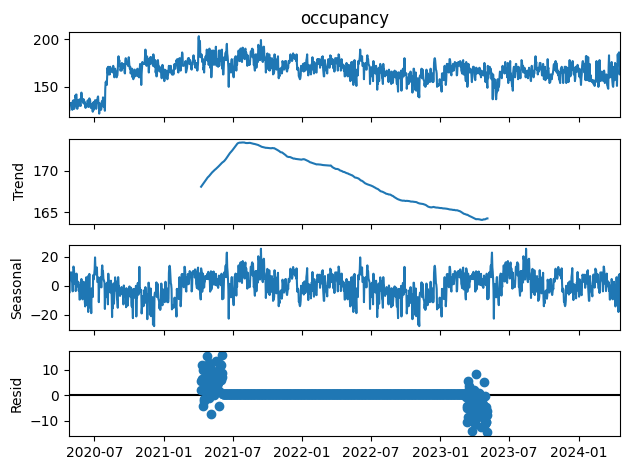

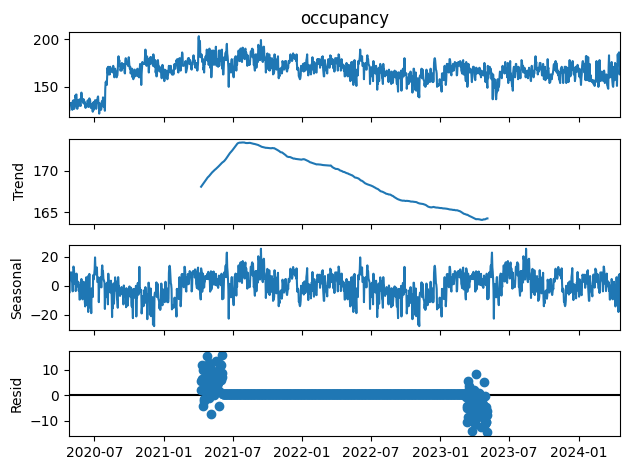

In [5]:
health.index.freq = 'D'
decompose_result = seasonal_decompose(health['occupancy'],model='additive',period=700)
decompose_result.plot()

In [576]:
# Trend test
result = mk.original_test(health['occupancy'])
#result2 = mk.seasonal_test(health['occupancy'])
print(result)
print(result.trend)
#print(result2)

Mann_Kendall_Test(trend='decreasing', h=True, p=2.1802506466883642e-09, z=-5.9837745337413795, Tau=-0.1045860453890653, s=-110934.0, var_s=343693306.0, slope=-0.004231311706629055, intercept=171.08039492242594)
decreasing


In [596]:
# Seasonal test

res = []
print(type(health.index))
health['month'] = health.index.month
print(health)
for i in health.index.month.unique():
    res.append(health[health['month'] == i]['occupancy'].values)

result = stats.kruskal(*res)
print(result)

if(result.pvalue < 0.05):  # 0.05 is the significance level
    print("High significance, deutet auf Saisonalität hin.")
else:
    print("Low significance, deutet auf Saisonalität hin.")


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
            occupancy  month
dates                       
2020-04-24        127      4
2020-04-25        126      4
2020-04-26        125      4
2020-04-27        128      4
2020-04-28        133      4
...               ...    ...
2024-04-15        182      4
2024-04-16        186      4
2024-04-17        186      4
2024-04-18        163      4
2024-04-19        169      4

[1457 rows x 2 columns]
KruskalResult(statistic=75.25910229928341, pvalue=1.2088262093645685e-11)
High significance, deutet auf Saisonalität hin.


In [558]:
# Set the frequency of the date time index as Monthly start as indicated by the data
health.index.freq = 'D'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='dates'>

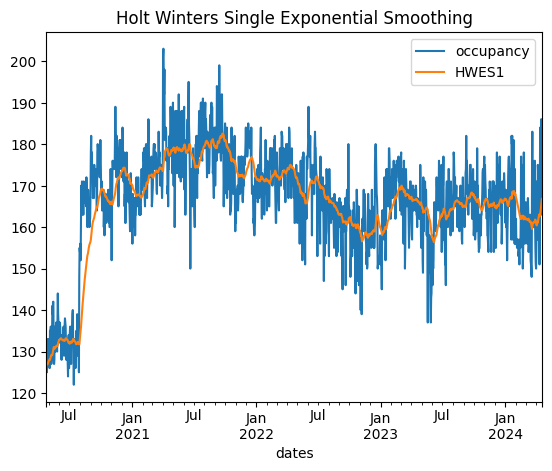

In [586]:
health['HWES1'] = SimpleExpSmoothing(health['occupancy']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
health[['occupancy','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

<Axes: title={'center': 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='dates'>

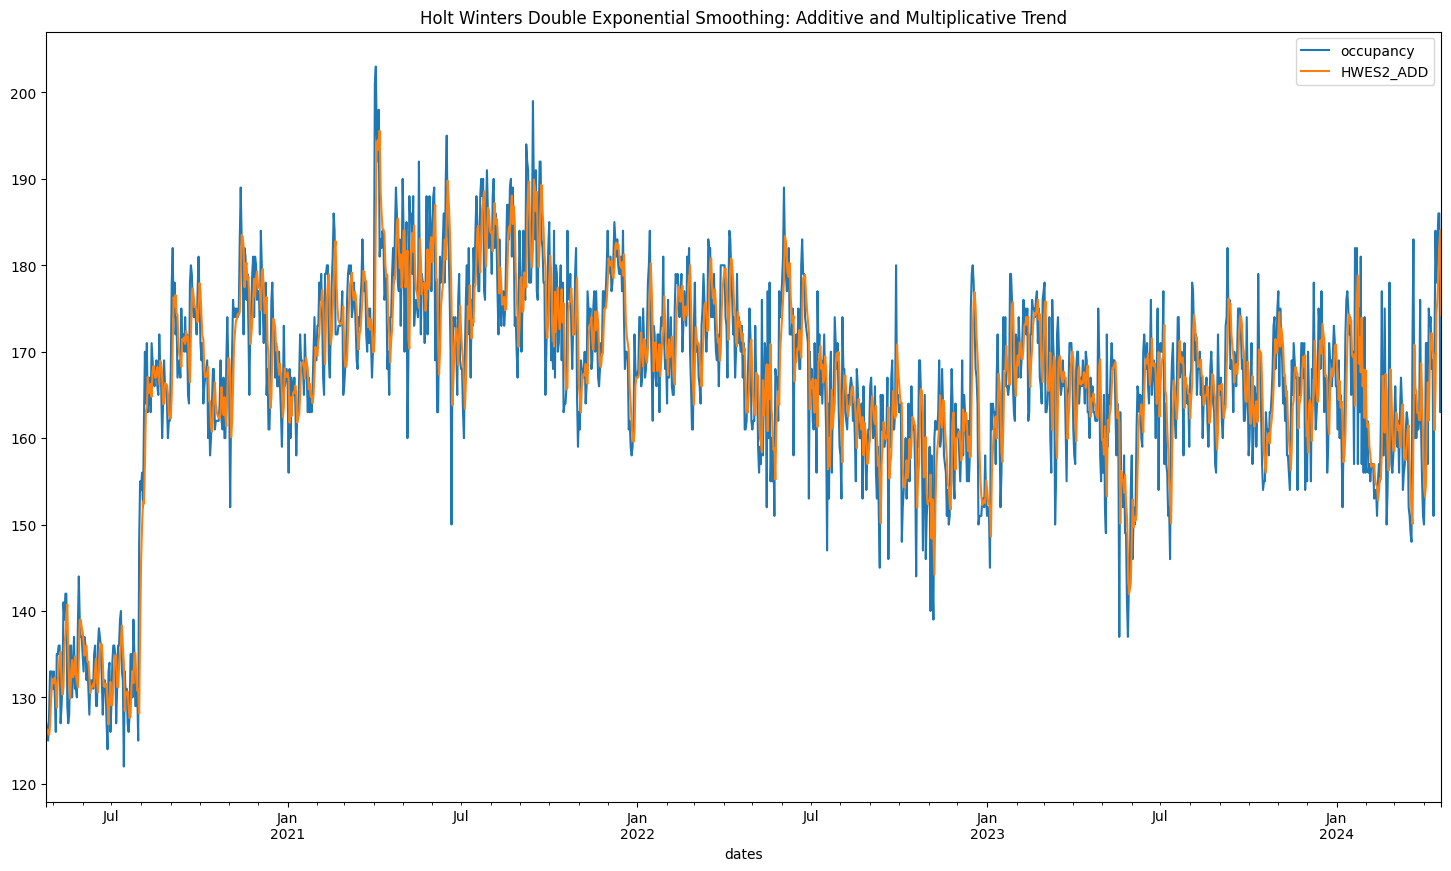

In [587]:
health['HWES2_ADD'] = ExponentialSmoothing(health['occupancy'],trend='add').fit().fittedvalues
health['HWES2_MUL'] = ExponentialSmoothing(health['occupancy'],trend='mul').fit()
health[['occupancy','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend',figsize=(18,10))

/Users/adrian/Project1_THA/intelligent-planning-of-care-staff/venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='dates'>

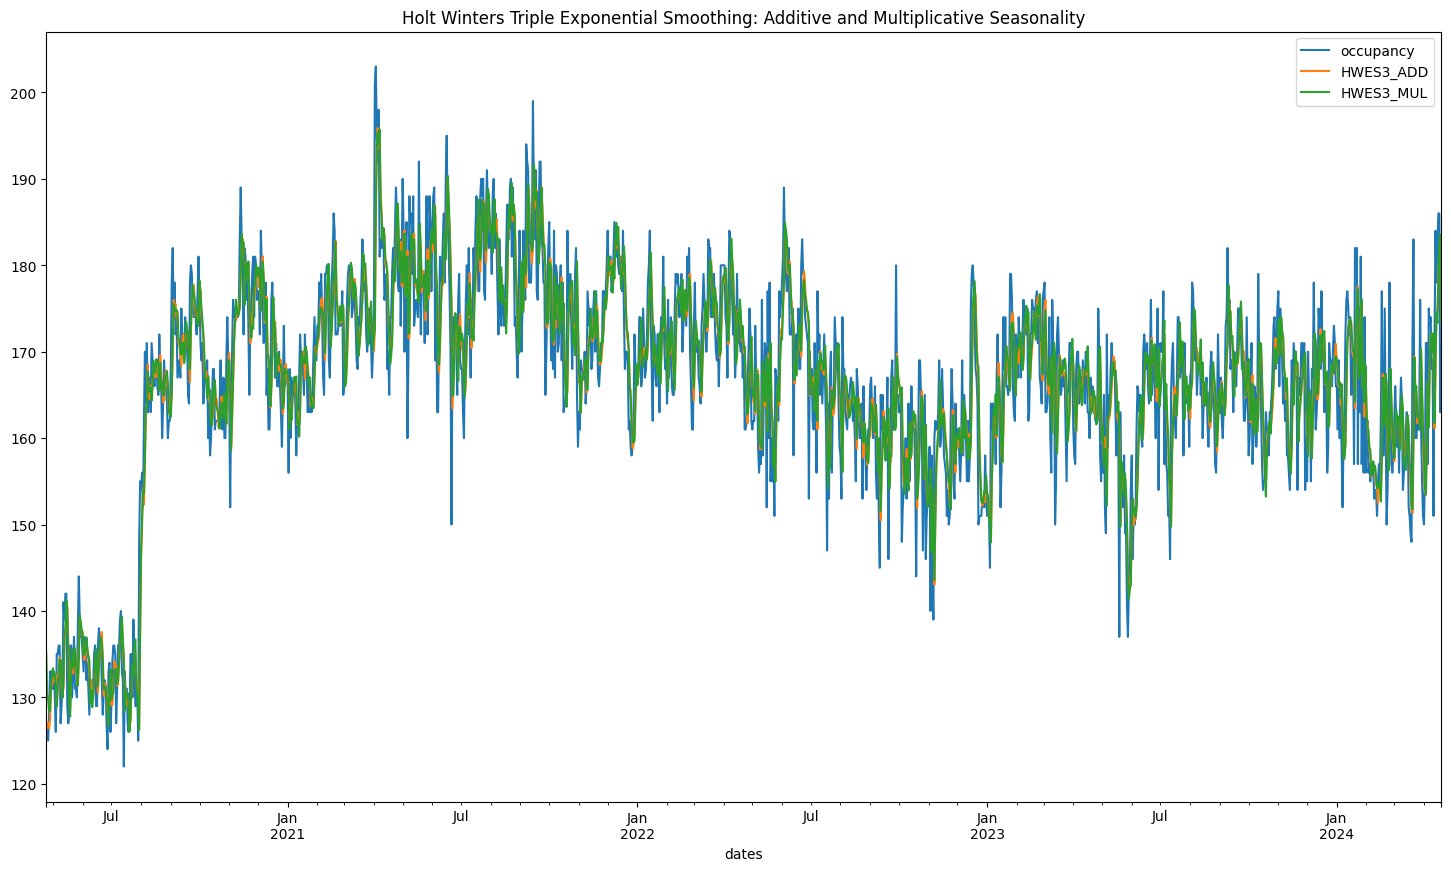

In [588]:
health['HWES3_ADD'] = ExponentialSmoothing(health['occupancy'],trend='add',seasonal='add',seasonal_periods=24).fit().fittedvalues
health['HWES3_MUL'] = ExponentialSmoothing(health['occupancy'],trend='mul',seasonal='mul',seasonal_periods=24).fit().fittedvalues
health[['occupancy','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality',figsize=(18,10))

In [597]:
#health = pd.read_csv('../output/cut-data.csv',
#    usecols=['dates','occupancy'], index_col='dates', parse_dates=True)
health = pd.read_csv('../output/08311.csv',
    usecols=['dates','occupancy'], index_col='dates', parse_dates=True)
health.index.freq = 'D'
target_days = 30
holt_params = {
    'trend': 'add', 
    'damped_trend': False,
    'seasonal': 'mul', 
    'seasonal_periods': 350,
    'initialization_method': 
    'heuristic'}
#train and test
train_health = health[0:len(health)-target_days]
test_health = health[len(health)-target_days:len(health)]

In [598]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Definieren der Parameterbereiche
smoothing_levels = np.arange(0.80, 0.90, 0.01)
smoothing_trends = np.arange(0.00, 0.10, 0.01)
smoothing_seasonals = np.arange(0.00, 0.20, 0.01)

# Variablen für die Speicherung des besten Ergebnisses
best_score = float("inf")
best_params = {}

# Grid Search über die Parameterbereiche
for level in smoothing_levels:
    for trend in smoothing_trends:
        for seasonal in smoothing_seasonals:
            model = ExponentialSmoothing(train_health['occupancy'], seasonal='add', seasonal_periods=12).fit(
                smoothing_level=level, smoothing_trend=trend, smoothing_seasonal=seasonal)
            predictions = model.forecast(len(test_health))
            mse = mean_squared_error(test_health, predictions)

            # Update der besten Parameter, wenn der aktuelle MSE kleiner ist
            if mse < best_score:
                best_score = mse
                best_params = {'level': level, 'trend': trend, 'seasonal': seasonal}

print("Best Parameters:", best_params)


Best Parameters: {'level': 0.8900000000000001, 'trend': 0.0, 'seasonal': 0.0}


/Users/adrian/Project1_THA/intelligent-planning-of-care-staff/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/adrian/Project1_THA/intelligent-planning-of-care-staff/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/adrian/Project1_THA/intelligent-planning-of-care-staff/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/adrian/Project1_THA/intelligent-planning-of-care-staff/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=Fa

man_alpha: 0.0, mse_alpha: 0.0, mape_alpha: 0.15
Mean Squared Error = 131.7
Mean Absolute Error = 9.7
Root Mean Squared Error = 11.476062042355817
Mean Absolute Percentage Error = 0.05684492689059565


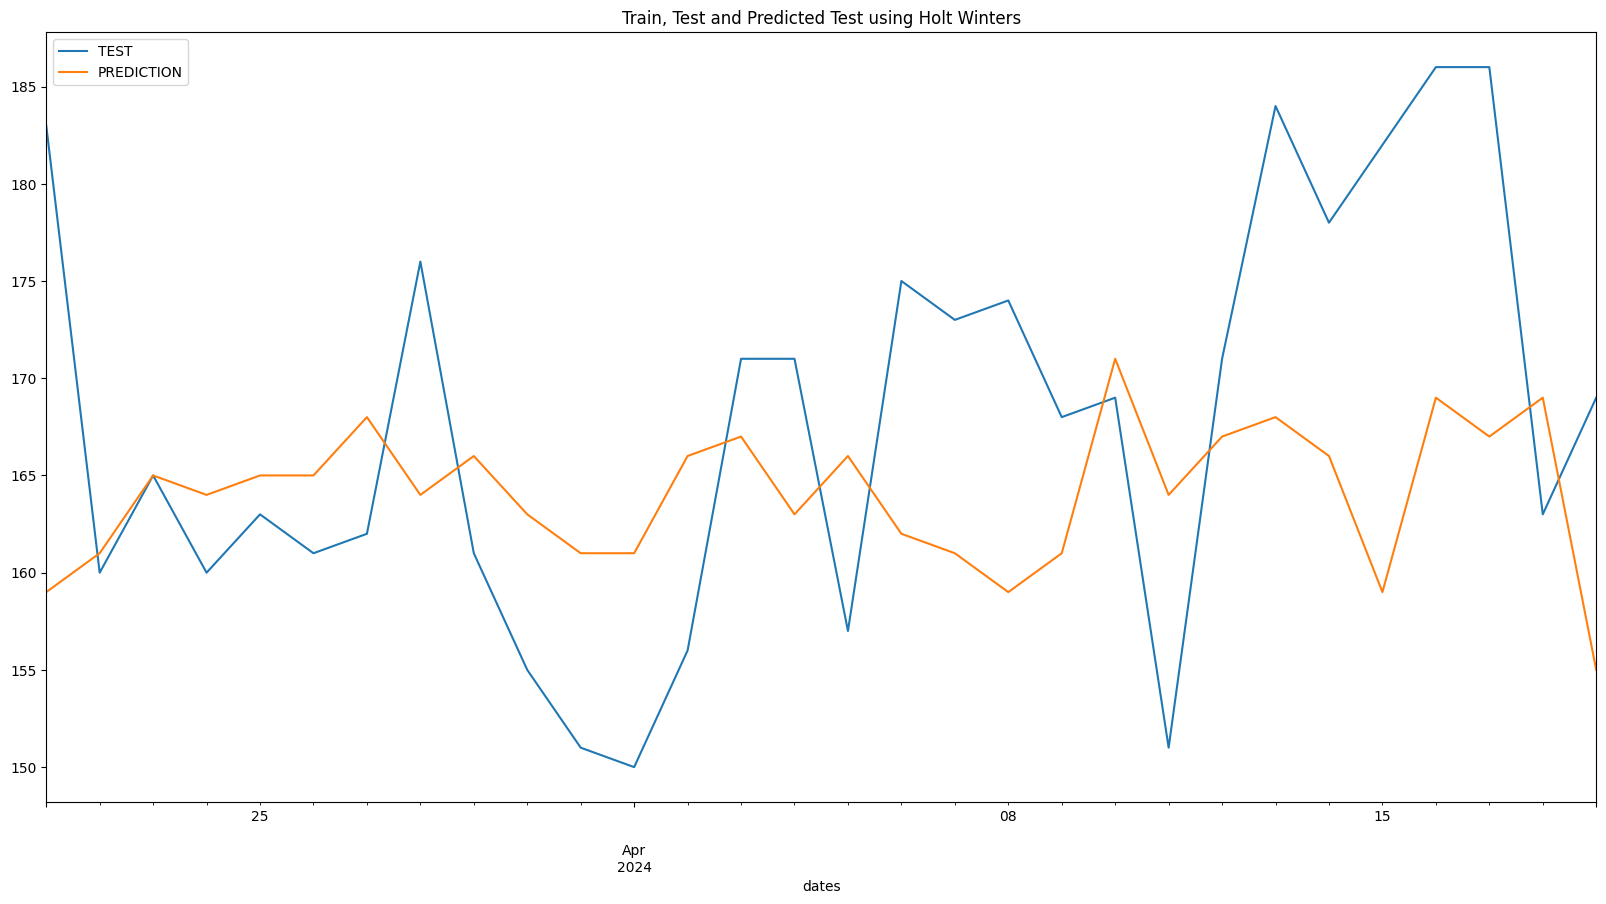

In [599]:
man_alpha = 1000
mse_alpha = 1000
mape_alpha = 1000
man = 1000
mse = 1000
mape = 1000

for i in np.arange(0.0, 0.16, 0.01):    
    fitted_model = ExponentialSmoothing(train_health['occupancy'],**holt_params).fit(smoothing_level=0.89, smoothing_trend=0.0,
                                                                                smoothing_seasonal=0.0)
    test_predictions = fitted_model.forecast(target_days)
    test_predictions = test_predictions.astype(int)
    # test_health['occupancy'].plot(legend=True,label='TRAIN')

    if mean_absolute_error(test_health, test_predictions) < man:
        man_alpha = i
    if mean_squared_error(test_health, test_predictions) < man:
        mse_alpha = i
    if mean_absolute_percentage_error(test_health, test_predictions) < man:
        mape_alpha = i

    man = mean_absolute_error(test_health,test_predictions)
    mse = mean_squared_error(test_health,test_predictions)
    mape= mean_absolute_percentage_error(test_health,test_predictions)


fitted_model = ExponentialSmoothing(train_health['occupancy'],**holt_params).fit(smoothing_level=0.89, smoothing_trend=0.0,
                                                                                smoothing_seasonal=0.0)
test_predictions = fitted_model.forecast(target_days)
test_predictions = test_predictions.astype(int)
test_health['occupancy'].plot(legend=True,label='TEST',figsize=(20,10))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(f'man_alpha: {man_alpha}, mse_alpha: {mse_alpha}, mape_alpha: {mape_alpha}')
print(f'Mean Squared Error = {mean_squared_error(test_health,test_predictions)}')
print(f'Mean Absolute Error = {mean_absolute_error(test_health,test_predictions)}')
print(f'Root Mean Squared Error = {np.sqrt(mean_squared_error(test_health,test_predictions))}')
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(test_health,test_predictions)}')



<Axes: xlabel='dates'>

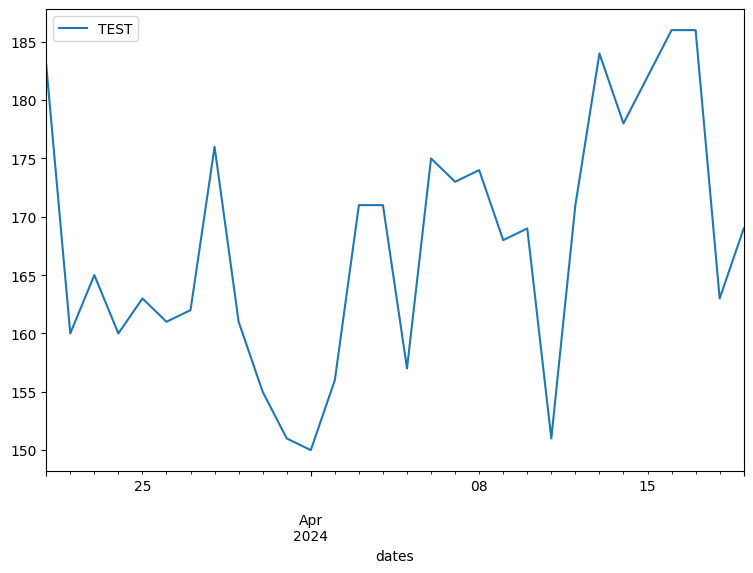

In [600]:
test_health['occupancy'].plot(legend=True,label='TEST',figsize=(9,6))
#test_predictions.plot(legend=True,label='PREDICTION',xlim=['1959–01–01','1961–01–01'])

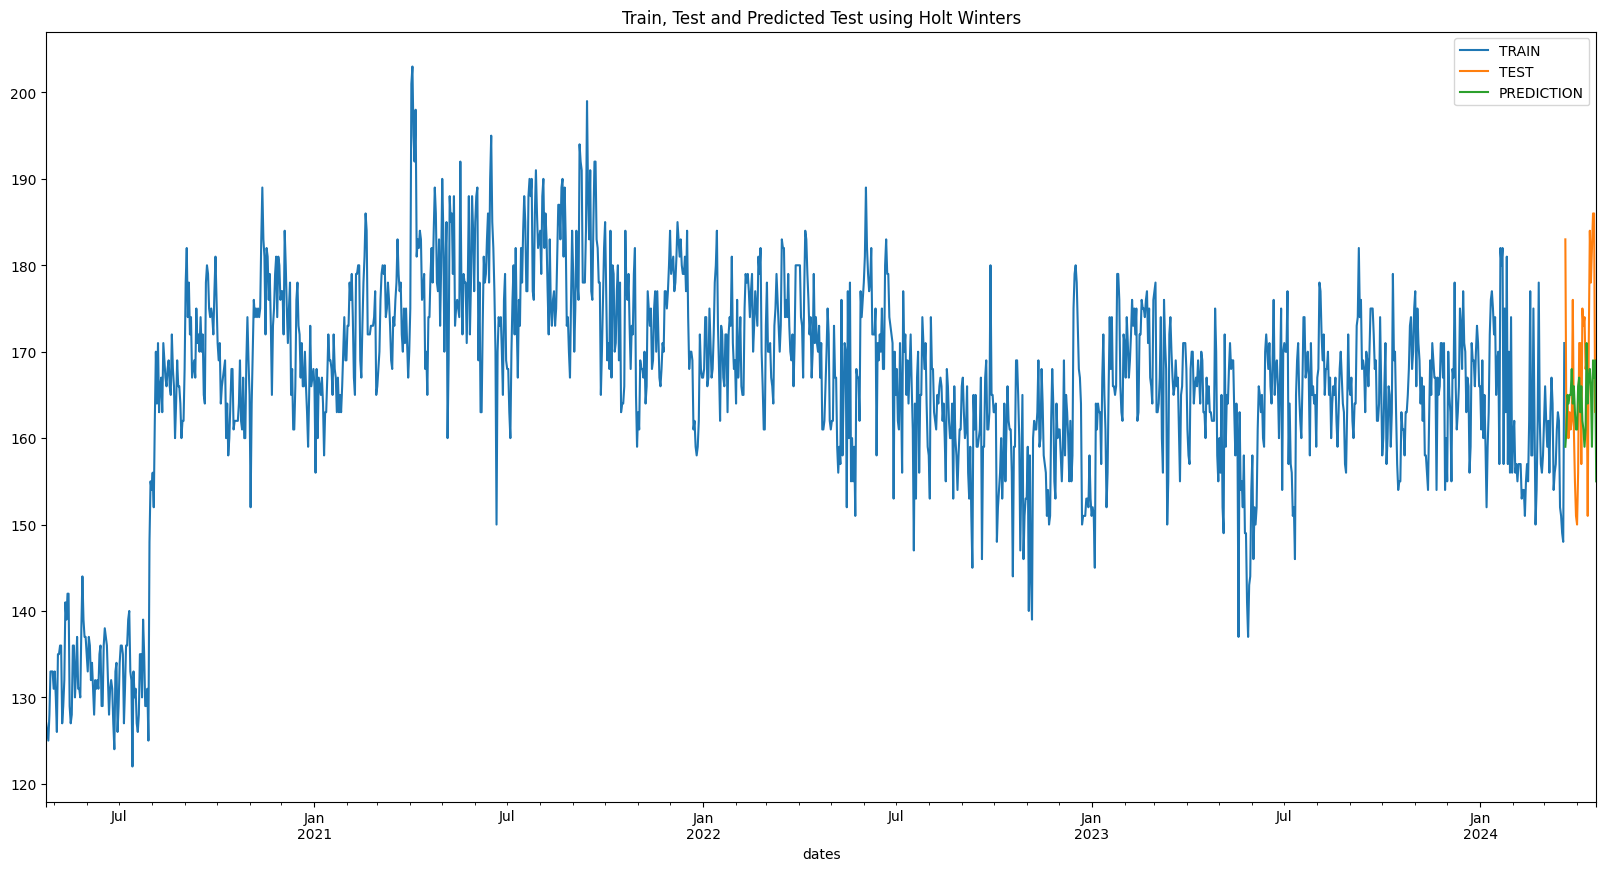

In [601]:
plt.figure(figsize=(20, 10))  # Set the size of the plot

# Plot the training data
train_health['occupancy'].plot(legend=True, label='TRAIN')

# Plot the test data
test_health['occupancy'].plot(legend=True, label='TEST')

# Plot the predicted values
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()  # Show the plot

In [602]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(f'Mean Absolute Error = {mean_absolute_error(test_health,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_health,test_predictions)}')
print(f'Root Mean Squared Error = {np.sqrt(mean_squared_error(test_health,test_predictions))}')
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(test_health,test_predictions)}')

Mean Absolute Error = 9.7
Mean Squared Error = 131.7
Root Mean Squared Error = 11.476062042355817
Mean Absolute Percentage Error = 0.05684492689059565


In [603]:
unix_timestamp = int(time.time())
#output_file = (
#    '../output/holt_winter/holt-winter-%d.csv' % unix_timestamp
#)
output_file = (
    '../output/holt_winter/holt-winter-08311-%d.csv' % unix_timestamp
)

In [604]:
#fill the csv with the prediction data
out = (f'target_days: {target_days}\n' )
out = out + "parameters: \n"
for i in holt_params: 
    out = out + (f'{i}: {holt_params[i]}\n')
out = out + (f'Mean Absolute Error = {mean_absolute_error(test_health,test_predictions)}\n')
out = out + (f'Mean Squared Error = {mean_squared_error(test_health,test_predictions)}\n')
out = out + (f'Root Mean Squared Error = {np.sqrt(mean_squared_error(test_health,test_predictions))}\n')
out = out + (f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(test_health,test_predictions)}\n')

out = out + 'dates' + ',' + 'occupancy' + '\n'

for i in range(len(test_predictions)):
    out = out + str((train_health.index[len(train_health)-1] + pd.DateOffset(i)).date()) + ',' + str(test_predictions.iloc[i]) + '\n'

with open(output_file,'w') as f:
    f.write(out)


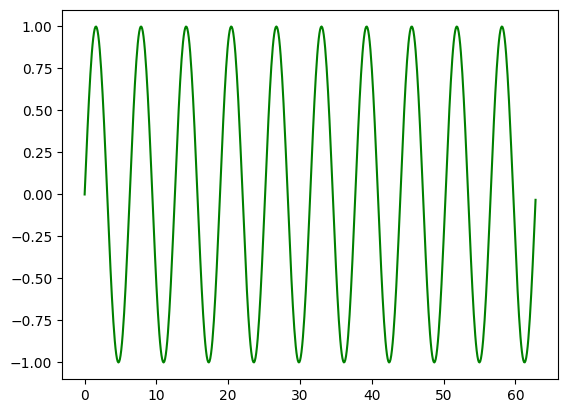

In [605]:
x = np.arange(0,20*np.pi,0.1)
sinus = np.sin(x)
plt.plot(x, sinus, color='green')
plt.show()


In [606]:
import numpy as np
import pandas as pd

# Generate date range
start_date = '2024-01-01'
end_date = '2025-01-01'
dates = pd.date_range(start=start_date, end=end_date)

# Generate sinus data
amplitude = 1  # Amplitude of the sinus wave
frequency = 0.1  # Frequency of the sinus wave
phase = 0  # Phase shift of the sinus wave
sinus_data = amplitude * np.sin(np.pi * frequency * np.arange(len(dates)) + phase)



# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Sinus_Value': sinus_data})
df.set_index('Date', inplace=True)


print(df.head())


            Sinus_Value
Date                   
2024-01-01     0.000000
2024-01-02     0.309017
2024-01-03     0.587785
2024-01-04     0.809017
2024-01-05     0.951057


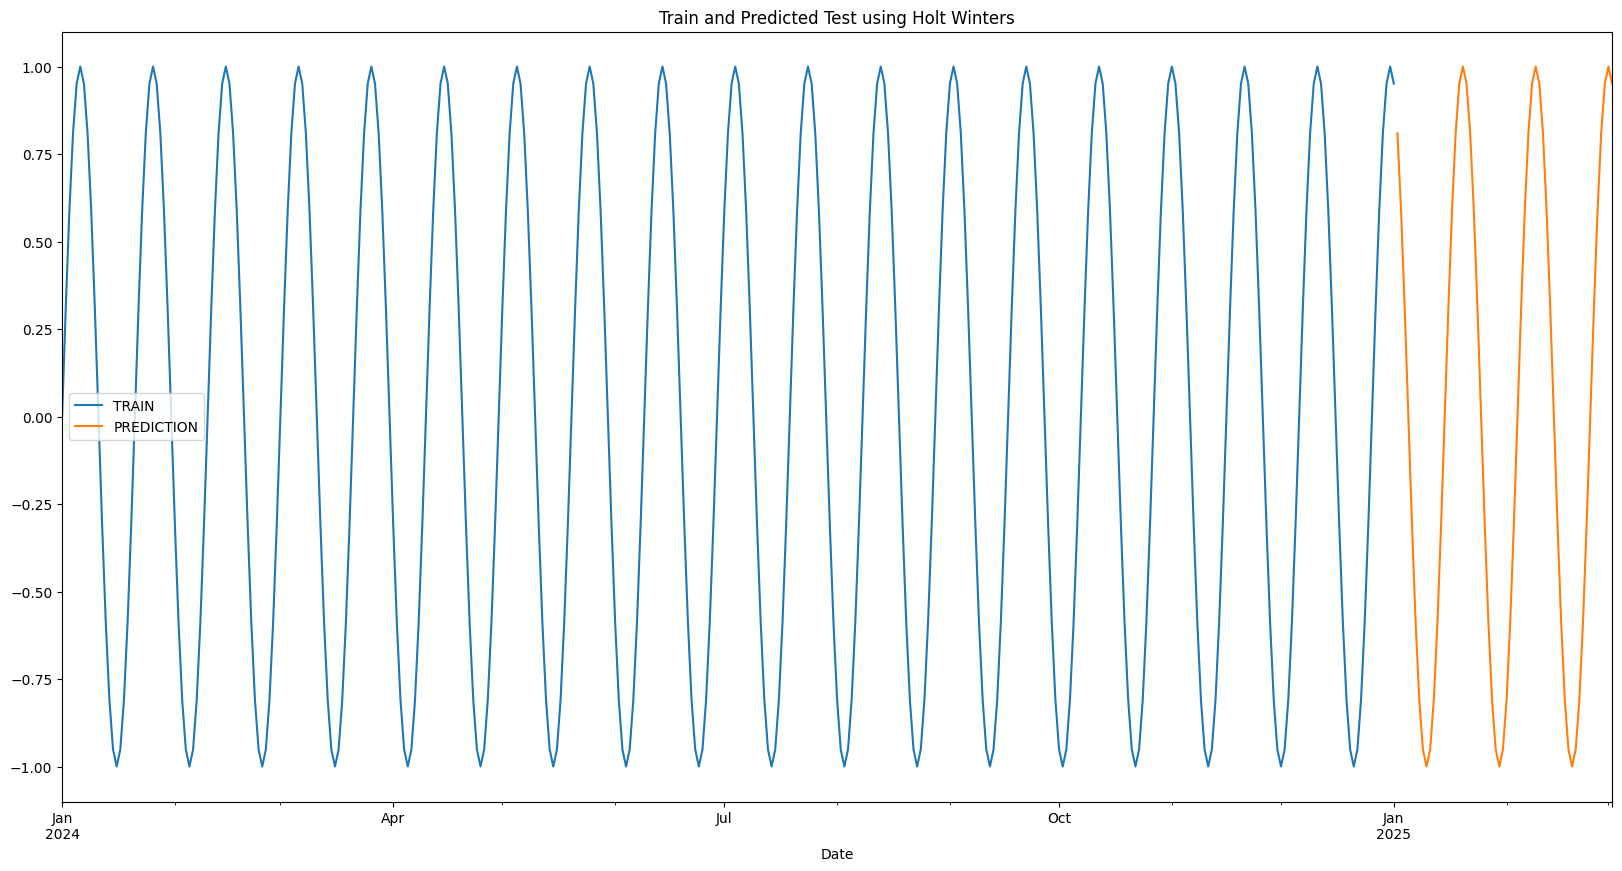

In [607]:
df.index.freq = 'D'

sinus_model = ExponentialSmoothing(df['Sinus_Value'],trend=None,seasonal='add',seasonal_periods=60).fit()

predictions_sinus = sinus_model.forecast(60)

plt.figure(figsize=(20, 10))  # Set the size of the plot

# Plot the training data
df['Sinus_Value'].plot(legend=True, label='TRAIN')

# Plot the test data
predictions_sinus.plot(legend=True, label='PREDICTION')



plt.title('Train and Predicted Test using Holt Winters')
plt.show()  # Show the plot
